# K 近邻算法（K-Nearest Neighbors, KNN）
Ｋ近邻算法是一种简单且常用的分类和回归算法。

Ｋ近邻算法属监督学习的一种，核心思想是通过计算待分类样本与训练集中各个样本的距离，找到<font color=0099ff><b>距离最近的Ｋ个样本</b></font>，然后根据这Ｋ个样本的类别或值来预测待分类样本的类别或值。

## KNN 基本原理
1. **计算距离**：计算待分类样本与训练集中每个样本之间的距离。常用的距离度量方法包括欧氏距离、曼哈顿距离和闵可夫斯基距离等。
2. **选择K值**：根据计算出的距离，选择距离最近的K个样本。Ｋ值的选择会影响分类结果，过小的Ｋ值可能导致过拟合，过大的Ｋ值可能导致欠拟合。
3. **投票或平均**：对于分类问题，K个最近邻中出现次数最多的类别即为待分类样本的类别；对于回归问题，计算Ｋ个最近邻的值的平均值即为待分类样本的值。

## KNN 的优缺点
<font color=blue><b>优点：</b></font>
- **简单易懂**：KNN算法直观且易于实现，适合初学者理解机器学习的基本概念。
- **无参数模型**：KNN不需要对数据进行假设，属于非参数模型。
- **对数据分布无要求**：KNN不依赖于数据的分布形式，适用于各种类型的数据。
- **适应多分类问题**：KNN可以自然地处理多分类问题，而不需要进行额外的修改。

<font color=red><b>缺点：</b></font>
- **计算复杂度高**：由于需要计算待分类样本与所有训练样本的距离，计算复杂度较高，尤其在大规模数据集上表现不佳。
- **对噪声敏感**：KNN对噪声数据较为敏感，可能影响分类结果。
- **维度灾难**：在高维空间中，距离度量可能变得不可靠，导致KNN性能下降。
- **需要选择合适的K值**：K值的选择对模型性能有较大影响，需要通过交叉验证等方法进行调优。

## KNN python 实现

Accuracy: 75.56%


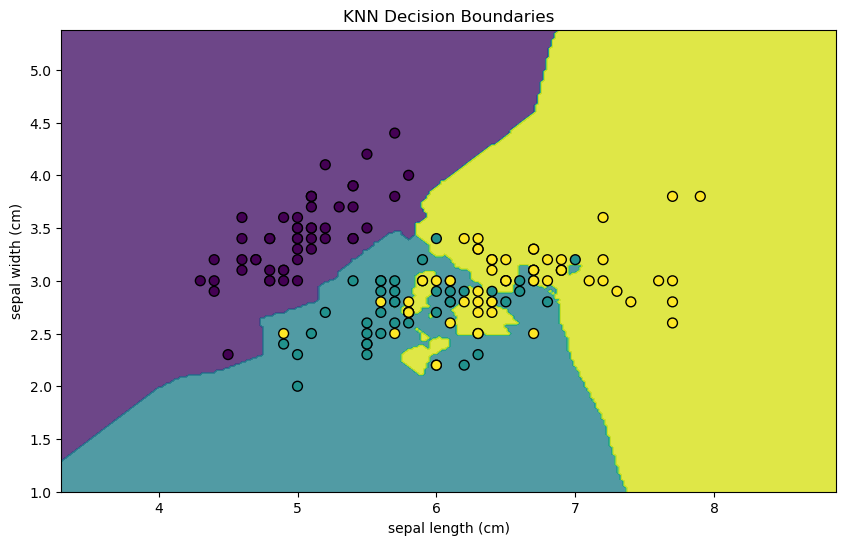

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# load dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # use only first two features for easy visualization
y = iris.target

# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model
knn.fit(X_train, y_train)

# make predictions
y_pred = knn.predict(X_test)

# evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')



# visualize decision boundaries
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# create mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Use the KNN model to predict each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
plt.title('KNN Decision Boundaries')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

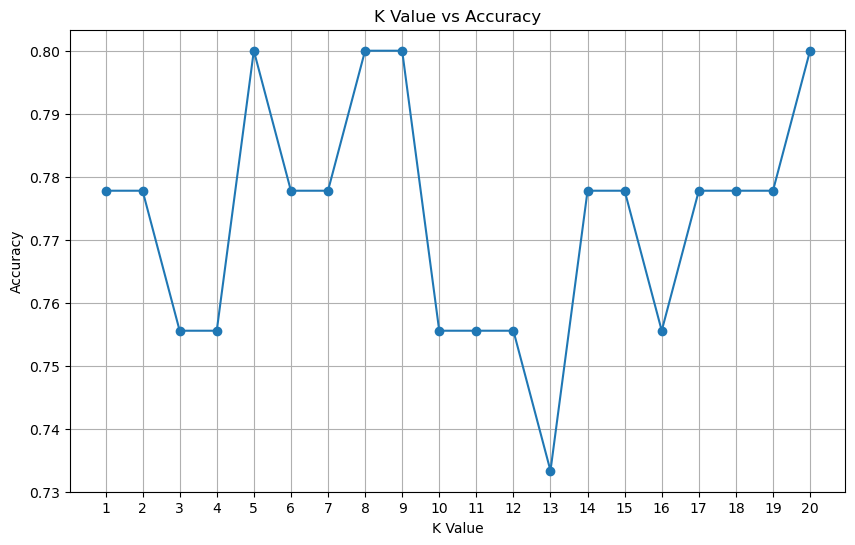

In [4]:
# Adjust K value and observe changes in accuracy
k_range = range(1, 21)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# plot accuracy vs K value
plt.figure(figsize=(10, 6))
# plt.scatter(k_range, accuracies, marker='o')
plt.plot(k_range, accuracies, marker='o')
plt.title('K Value vs Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid()
plt.show()

Mean Squared Error: 0.23
Accuracy (rounded): 70.00%


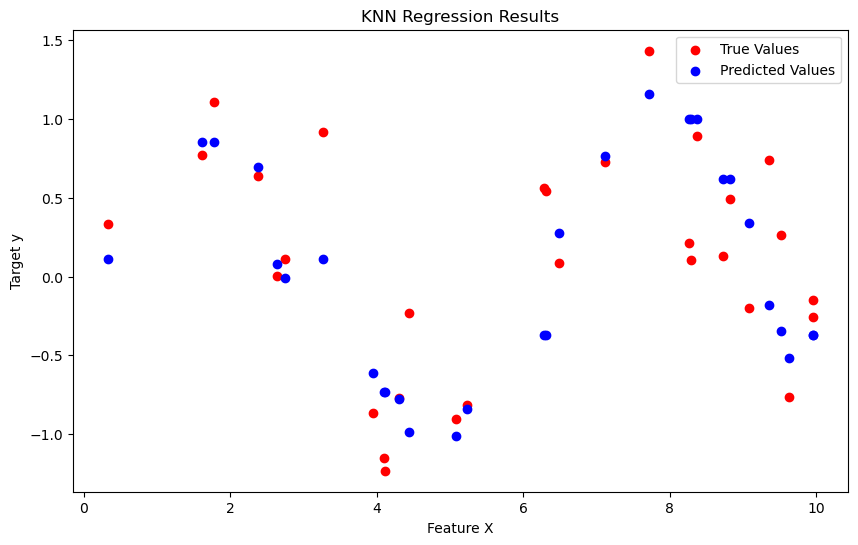

In [5]:
# Use KNN model for regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

# generate test data
X = np.random.rand(100, 1) * 10  # 100 random points between 0 and 10
y = np.sin(X).ravel() + np.random.normal(0, 0.5, X.shape[0])  # target with noise

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create KNN regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)

# fit the model
knn_reg.fit(X_train, y_train)

# make predictions
y_pred = knn_reg.predict(X_test)

# evaluate mean squared error and accuracy
mse = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(np.round(y_test), np.round(y_pred))
print(f'Mean Squared Error: {mse:.2f}')
print(f'Accuracy (rounded): {accuracy * 100:.2f}%')

# visualize results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', label='True Values')
plt.scatter(X_test, y_pred, color='blue', label='Predicted Values')
plt.title('KNN Regression Results')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.legend()
plt.show()